# SPAM EMAIL DETECTION

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import category_encoders as ce
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import tensorflow as tf
import numpy as np
import joblib

In [2]:
import os
os.chdir(r'C://Users//12693//Desktop//BN//spring 2023//ML//project')

In [3]:
#Reading data from csv
df = pd.read_csv("spam.csv")

In [4]:
#Displaying the first 10 records 
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [5]:
#Checking for null values and duplicates
df = df.dropna()
df = df.drop_duplicates()
print(df.isna().sum())

Category    0
Message     0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5157 non-null   object
 1   Message   5157 non-null   object
dtypes: object(2)
memory usage: 120.9+ KB


In [7]:
df['Category'].value_counts()

ham     4516
spam     641
Name: Category, dtype: int64

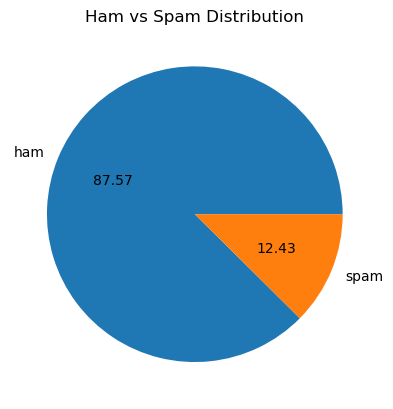

In [8]:
#Displaying the category distribution on a pie chart
plt.pie(df['Category'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.title("Ham vs Spam Distribution")
plt.show()

In [9]:
#Transforming categorical features into numerical features using one-hot encoding
encoder = ce.OneHotEncoder(cols= 'Category', use_cat_names=True)
df = encoder.fit_transform(df)
df.head(10)

,Category_ham,Category_spam,Message
0,1,0,"Go until jurong point, crazy.. Available only ..."
1,1,0,Ok lar... Joking wif u oni...
2,0,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,0,U dun say so early hor... U c already then say...
4,1,0,"Nah I don't think he goes to usf, he lives aro..."
5,0,1,FreeMsg Hey there darling it's been 3 week's n...
6,1,0,Even my brother is not like to speak with me. ...
7,1,0,As per your request 'Melle Melle (Oru Minnamin...
8,0,1,WINNER!! As a valued network customer you have...
9,0,1,Had your mobile 11 months or more? U R entitle...


In [10]:
#Dropping the Category_ham column
df.drop(['Category_ham'], axis=1).head(10)

,Category_spam,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [11]:
#Splitting data into train and test with where 20% of data is used for testing
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.Category_spam, test_size = 0.2, random_state = 10)
print("Size of X_train = ", X_train.shape[0]) #input
print("Size of X_test = ", X_test.shape[0])   #input
print("Size of y_train = ", y_train.shape[0])
print("Size of y_test = ", y_test.shape[0])


Size of X_train =  4125
Size of X_test =  1032
Size of y_train =  4125
Size of y_test =  1032


In [12]:
#Displaying the category proportion of train,test and the whole dataset
x_train,x_test,y_train,y_test=train_test_split(df.Message,df.Category_spam,test_size=0.2, random_state=10,stratify=df.Category_spam)
print(f"Ham-Spam proportion of train data set:\n{y_train.value_counts(normalize=True)}\n")
print(f"Ham-Spam proportion of test data set:\n{y_train.value_counts(normalize=True)}\n")
print(f"Ham-Spam proportion of full data set:\n{df['Category_spam'].value_counts(normalize=True)}")

Ham-Spam proportion of train data set:
0    0.875636
1    0.124364
Name: Category_spam, dtype: float64

Ham-Spam proportion of test data set:
0    0.875636
1    0.124364
Name: Category_spam, dtype: float64

Ham-Spam proportion of full data set:
0    0.875703
1    0.124297
Name: Category_spam, dtype: float64


In [13]:
#Converting the training text data into a numerical representation
vectorizer = CountVectorizer()
x_train_count = vectorizer.fit_transform(x_train.values)
X_train_count = x_train_count.toarray()

print(X_train_count[:5])
# The resulting matrix can be used to train and evaluate a classifier to 
# distinguish between spam and legitimate emails based on the frequency of 
# words that commonly appear in spam/ham emails.

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [14]:
#Building a Multinomial Naive Bayes model
# The algorithm works by calculating the conditional probability of each class 
# (e.g., spam or ham) given the input features (i.e., the frequency of each word in the document).
model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [15]:
#Evaluating the performance of the trained Multinomial NB model using test data. 
X_test_count = vectorizer.transform(X_test)
model.predict(X_test_count)

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [16]:
#Training accuracy of the model
print(f"The training accuracy of the model: {model.score(X_train_count, y_train)}")

The training accuracy of the model: 0.9932121212121212


In [17]:
#K-fold cross-validation. Uses unseen data and evaluates the performance of the model.
cross = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = "accuracy")
print(f"Accuracy of 10 folds:\n{cross}\n")
print(f"Average Accuracy: {cross.mean()}\n")

y_train_pred = model.predict(X_train_count)
# training error rate
print(f"Training error rate: {1 - accuracy_score(y_train, y_train_pred)}")
#training precision
print(f"Training precision score: {precision_score(y_train, y_train_pred)}")
# training recall
print(f"Training recall score: {recall_score(y_train, y_train_pred)}")
# training f1-score
print(f"Training f1 score: {f1_score(y_train, y_train_pred)}")


Accuracy of 10 folds:
[0.99515738 0.97820823 0.98062954 0.97820823 0.97336562 0.97815534
 0.9684466  0.97087379 0.98300971 0.9684466 ]

Average Accuracy: 0.9774501046098875

Training error rate: 0.006787878787878787
Training precision score: 0.9801980198019802
Training recall score: 0.9649122807017544
Training f1 score: 0.9724950884086445


Text(50.722222222222214, 0.5, 'Truth')

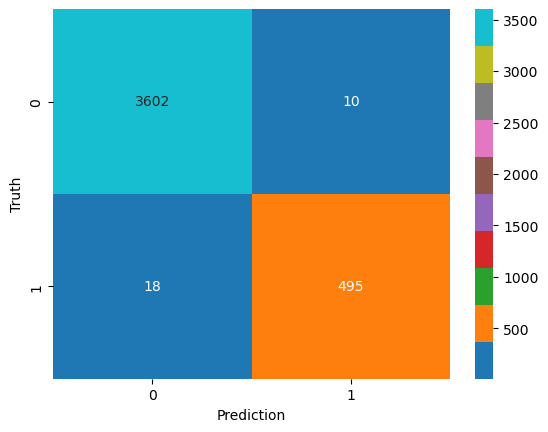

In [18]:
#Visualizing the confusion matrix of the train data results
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm,cmap="tab10",annot=True,fmt="d")
plt.xlabel("Prediction")
plt.ylabel("Truth")

In [19]:
# classification report for each class
print(classification_report(y_train, y_train_pred))

# precision: the fraction of true positives among the instances predicted as positive.
# recall: the fraction of true positives among all actual positive instances.
# f1-score: the harmonic mean of precision and recall.
# support: the number of instances in each class.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3612
           1       0.98      0.96      0.97       513

    accuracy                           0.99      4125
   macro avg       0.99      0.98      0.98      4125
weighted avg       0.99      0.99      0.99      4125



In [20]:
#Converting the testing text data into a numerical representation
x_test_count= vectorizer.transform(x_test.values)
x_test_count.toarray()
x_test_count[:5]

<5x7665 sparse matrix of type '<class 'numpy.int64'>'
	with 95 stored elements in Compressed Sparse Row format>

Text(50.722222222222214, 0.5, 'Truth')

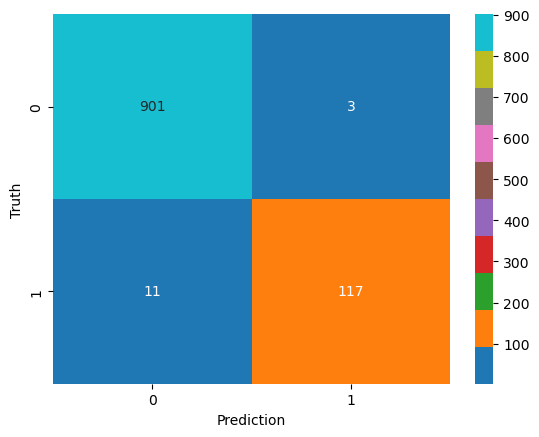

In [21]:
# Visualizing the confusion matrix of the test data results
y_test_predicted=model.predict(x_test_count)
cm_test= confusion_matrix(y_test,y_test_predicted)
sns.heatmap(cm_test,cmap="tab10",annot=True,fmt="d")
plt.xlabel("Prediction")
plt.ylabel("Truth")


In [22]:
print(f"Accuracy of the model: {accuracy_score(y_test,y_test_predicted)}")
print(f"The precision of the model: {precision_score(y_test,y_test_predicted)}")
print(f"The recall of the model: {recall_score(y_test,y_test_predicted)}")
print(f"f1 score: {f1_score(y_test,y_test_predicted)}")

Accuracy of the model: 0.9864341085271318
The precision of the model: 0.975
The recall of the model: 0.9140625
f1 score: 0.9435483870967741


In [23]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       904
           1       0.97      0.91      0.94       128

    accuracy                           0.99      1032
   macro avg       0.98      0.96      0.97      1032
weighted avg       0.99      0.99      0.99      1032



In [24]:
# Save the model
joblib.dump(model, 'spam_classifier_model.joblib')
# Load the trained model
model = joblib.load('spam_classifier_model.joblib')

In [25]:
# Define a function to predict if an email is spam or ham
def predict_email(email_content):
    email_content = email_content.lower()
    email_content = email_content.replace('[^\w\s]','')
    email_content = email_content.replace('\n',' ')
    email_content = email_content.replace('\r','')
    email_content = email_content.replace('\t',' ')
    email_content = email_content.strip()
    email_content = ' '.join(email_content.split())

    # Apply the trained model to make a prediction
    email_count = vectorizer.transform([email_content])
    prediction = model.predict(email_count)

    # Return the prediction
    return prediction[0]


In [26]:
# Ask the user to input email content
email_content = input("Enter the email content: ")

# Make a prediction using the trained model
prediction = predict_email(email_content)

# Print the prediction
if prediction == 1:
    print("The email is spam.")
else:
    print("The email is ham.")

The email is ham.
